In [1]:
import scipy.io as sio # Load MATLAB file
import numpy as np
# download the training data form 

# the array dzip contain the numbers with length 1707
dzip = sio.loadmat('dzip.mat')['dzip'][0]
#the array azip contain the 1707 images for the numbers in dzip array
azip = sio.loadmat('azip.mat')['azip']

# in the function, we will count how many times the digit apper in dzip
def count_numbers_copies(dzip):
    # digits_copies_counter hold the number of copies
    digits_copies_counter =[]
    # hold the indexes of each digit in dzip
    indexes = []
    for digit in range (10):
        indexes.append ([])
        counter = 0
        for index, i in enumerate (dzip):
            if i == digit:
                counter +=1
                indexes[digit].append(index)
        digits_copies_counter.append(counter)
    return digits_copies_counter,indexes
digits_copies ,indexes =  count_numbers_copies(dzip)


# create numpy zreos matrices for each digit in array of size 10 
def numpy_zreos_matrices(digits_copies):
    array_of_matrices = []
    for copies in digits_copies:
        # create matrix for each digit depend on the number of copies and 256 which is 16 * 16 pixels
        M = np.zeros(shape=(256,copies))
        array_of_matrices.append(M)
    
    return array_of_matrices
digits_matrices = numpy_zreos_matrices(digits_copies)


# now we fill our digits_matrices with inforamtion imges from azip
def preparation_function(dzip,azip,digits_matrices):
    for i in range (10):
        counter =0
        for index , item  in enumerate(dzip):
            if item == i:
                digits_matrices[i][:,counter] = azip[:,index]
                counter += 1
    return digits_matrices
digits_matrices = preparation_function(dzip,azip,digits_matrices)

# find the distance between the image and the matrix of the digit
def find_the_distance(M,k,var,azip ):
    U0 , S ,VT = np.linalg.svd(M)
    smallU0 = U0[:,0:k]
    d =azip[:,var]
    I = np.eye(256)
    v =np.matmul ((I - np.matmul (smallU0 , smallU0.T)) , d)
    distance = np.linalg.norm(v)  
    return distance 

In [2]:
# loading the test data 
# the array dtest contain the numbers with length 2007 for test purpuse 
dtest = sio.loadmat('dtest.mat')['dtest'][0] 
#the array testzip contain the 1707 images for the numbers in dzip array
testzip = sio.loadmat('testzip.mat')['testzip']

In [3]:
f = open ("Best_k_list.txt","r")
Best_k_list = f.read()
f.close()

print (Best_k_list)
best_k = 6


[1464, 131, 45, 23, 9, 10, 7, 2, 1, 2, 1, 3, 1, 1, 0, 2, 2, 0, 1, 0]


In [24]:
Errors_list =[]
k = 6
counter = 0 #correct prediction counter
for var in range (len(testzip)):
    distances = []
    for M in digits_matrices:
        distance = find_the_distance(M,k,var,testzip)
        distances.append(distance)
    x = min(v for v in distances)   # here we take the smallest distance 
    predict_digit = distances.index(x)    # we will take the index of that smallest distance
    if var < 100: # for printing the first 100 predictions 
        print (var,"-  predict digit = ", predict_digit , "real value =",dtest[var])
        if predict_digit != dtest[var]:
           print ("                      ^^^            ^^^")
    if predict_digit == dtest[var]:
        counter+=1
    else:
        L = [var,predict_digit]# the first index will be an index of a real digit,
                               #second is wrong predicted
        Errors_list.append(L)
print ("Our modle with k = ",k)
percentage=100* (counter/len(testzip))
print ("Has correct prediction percentage by ",percentage, "%")
print (Errors_list)

0 -  predict digit =  9 real value = 9
1 -  predict digit =  6 real value = 6
2 -  predict digit =  3 real value = 3
3 -  predict digit =  0 real value = 6
                      ^^^            ^^^
4 -  predict digit =  6 real value = 6
5 -  predict digit =  0 real value = 0
6 -  predict digit =  0 real value = 0
7 -  predict digit =  0 real value = 0
8 -  predict digit =  6 real value = 6
9 -  predict digit =  9 real value = 9
10 -  predict digit =  6 real value = 6
11 -  predict digit =  2 real value = 2
12 -  predict digit =  2 real value = 2
13 -  predict digit =  7 real value = 4
                      ^^^            ^^^
14 -  predict digit =  0 real value = 0
15 -  predict digit =  3 real value = 3
16 -  predict digit =  1 real value = 1
17 -  predict digit =  2 real value = 6
                      ^^^            ^^^
18 -  predict digit =  9 real value = 9
19 -  predict digit =  6 real value = 6
20 -  predict digit =  2 real value = 2
21 -  predict digit =  2 real value = 2
22 -  p

In [25]:
print ("Our modle with k = ",k)
percentage=100* (counter/len(testzip))
print ("Has correct prediction percentage by ",percentage, "%")

Our modle with k =  6
Has correct prediction percentage by  87.5 %


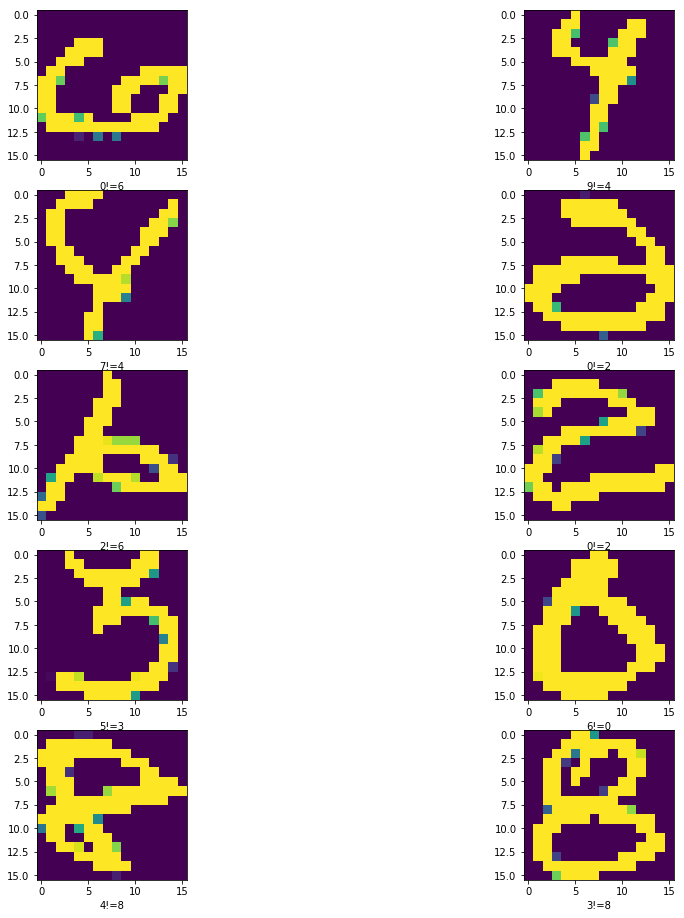

In [36]:
five = 5
fig,axs = plt.subplots(nrows=5,ncols=2)
plt.rcParams['figure.figsize'] = [16,16]
for i in range (five):
    for j in range(2):
        x=0
        if j ==0:
            x =i
        else:
            x =i+5
        var   = Errors_list[x][0]
        wrong = Errors_list[x][1]
        image0 = testzip[:,var]
        axs[i,j].imshow(image0.reshape((16,16)),vmin=-0.1,vmax=0.1)
        Title = str(wrong)+'!=' +str(dtest[var])
        axs[i,j].set_xlabel(Title)
        
plt.show() 

In [6]:
import time
Periods = []
percentageList =[]
for i in range (10):
    start = time.time()
    k = i+1
    counter = 0 #correct prediction counter
    for var in range (len(testzip)):
        distances = []
        for M in digits_matrices:
            distance = find_the_distance(M,k,var,testzip)
            distances.append(distance)
        x = min(v for v in distances)   # here we take the smallest distance 
        predict_digit = distances.index(x)    # we will take the index of that smallest distance
        if predict_digit == dtest[var]:
            counter+=1
    end = time.time()
    period = end - start
    Periods.append(period)
    print ("Our modle with k = ",k)
    percentage=100* (counter/len(testzip))
    percentageList.append(percentage)
    print ("Has correct prediction percentage by ",percentage, "%","period =",period)


Our modle with k =  1
Has correct prediction percentage by  77.34375 % period = 30.721217155456543
Our modle with k =  2
Has correct prediction percentage by  83.984375 % period = 35.6429328918457
Our modle with k =  3
Has correct prediction percentage by  85.9375 % period = 31.85168194770813
Our modle with k =  4
Has correct prediction percentage by  88.671875 % period = 28.733176708221436
Our modle with k =  5
Has correct prediction percentage by  87.5 % period = 29.580724000930786
Our modle with k =  6
Has correct prediction percentage by  87.5 % period = 27.770623207092285
Our modle with k =  7
Has correct prediction percentage by  89.453125 % period = 30.2973313331604
Our modle with k =  8
Has correct prediction percentage by  89.453125 % period = 29.955519676208496
Our modle with k =  9
Has correct prediction percentage by  91.40625 % period = 27.4730544090271
Our modle with k =  10
Has correct prediction percentage by  92.1875 % period = 29.98231863975525


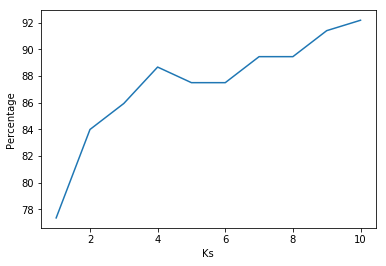

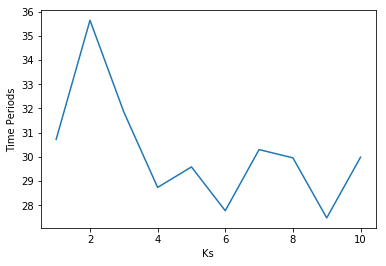

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
ks= [1,2,3,4,5,6,7,8,9,10]
plt.plot(ks,percentageList)
plt.ylabel('Percentage ')
plt.xlabel('Ks')
plt.show()

plt.plot(ks,Periods)
plt.ylabel('Time Periods')
plt.xlabel('Ks')
plt.show()